## Retail prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
features = pd.read_csv('Features data set.csv')
sales = pd.read_csv('sales data-set.csv')
stores = pd.read_csv('stores data-set.csv')

In [3]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [4]:
# Let's explore the "feature" dataframe
# Features dataframe contains additional data related to the store, department, and regional activity for the given dates.
# Store: store number
# Date: week
# Temperature: average temperature in the region
# Fuel_Price: cost of fuel in the region
# MarkDown1-5: anonymized data related to promotional markdowns. 
# CPI: consumer price index
# Unemployment: unemployment rate
# IsHoliday: whether the week is a special holiday week or not

In [5]:
# Let's explore the "sales" dataframe
# "Sales" dataframe contains historical sales data, which covers 2010-02-05 to 2012-11-01. 
# Store: store number
# Dept: department number
# Date: the week
# Weekly_Sales: sales for the given department in the given store
# IsHoliday: whether the week is a special holiday week

sales


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [22]:
features['Date'] = pd.to_datetime(features['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [23]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
df = pd.merge(sales, features, on = ['Store','Date','IsHoliday'])
df = pd.merge(df, stores, on = ['Store'], how = 'left')

<AxesSubplot:>

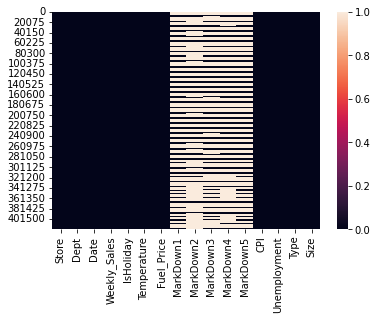

In [9]:
sns.heatmap(df.isnull())

In [10]:
df[['year','month','day']] = df.Date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))

In [11]:
df.drop(['year','day','Date'], axis=1, inplace=True)
df.fillna(0, inplace=True)

In [12]:
df.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
month           0
dtype: int64

In [24]:
df['month']=df['month'].astype(str).astype(int)

In [14]:
df.IsHoliday = df.IsHoliday.replace({False:0, True:1})

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

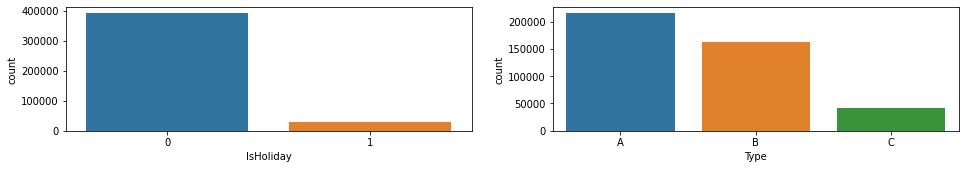

In [15]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.countplot(df['IsHoliday'])
fig.add_subplot(2,2,2)
sns.countplot(df['Type'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  int64  
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     421570 non-null  float64
 7   MarkDown2     421570 non-null  float64
 8   MarkDown3     421570 non-null  float64
 9   MarkDown4     421570 non-null  float64
 10  MarkDown5     421570 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  Type          421570 non-null  object 
 14  Size          421570 non-null  int64  
 15  month         421570 non-null  int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 54.7+ MB


In [17]:
df_target = df['Weekly_Sales']
df_final = df.drop(['Weekly_Sales'], axis=1)

In [18]:
df_final = pd.get_dummies(df_final, columns = ['Store', 'Dept', 'Type'], drop_first =True)

In [19]:
df_final.isnull().sum()

IsHoliday      0
Temperature    0
Fuel_Price     0
MarkDown1      0
MarkDown2      0
              ..
Dept_97        0
Dept_98        0
Dept_99        0
Type_B         0
Type_C         0
Length: 138, dtype: int64

In [26]:
X = df_final.astype('float32')
y = df_target.astype('float32')

In [27]:
# y=y.reshape(-1,1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

In [29]:
print('Shape of X_test = ', X_test.shape,  '\nShape of y_test ='  , y_test.shape)
print('Shape of X_train = ', X_train.shape,  '\nShape of y_train ='  , y_train.shape)
print('Shape of X_val = ', X_val.shape,  '\nShape of y_val ='  , y_val.shape)

Shape of X_test =  (31618, 138) 
Shape of y_test = (31618,)
Shape of X_train =  (358334, 138) 
Shape of y_train = (358334,)
Shape of X_val =  (31618, 138) 
Shape of y_val = (31618,)


In [30]:
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.2, max_depth = 10, n_estimators = 100)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [31]:
# make predictions on the test data

y_predict = model.predict(X_test)

In [32]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [33]:
result = model.score(X_test, y_test)

print("Accuracy : {}".format(result))

Accuracy : 0.9298215536515175


In [35]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6085.656 
MSE = 37035210.0 
MAE = 3025.5667 
R2 = 0.9298215536515175 
Adjusted R2 = 0.9295139001175396


In [85]:
from arize.pandas.logger import Client, Schema
from arize.utils.types import Environments, ModelTypes, Metrics
import uuid

API_KEY = '6d9c77b'
SPACE_KEY = '0c97e7835e69cde26d8'
arize_client = Client(space_key=SPACE_KEY, api_key=API_KEY)

model_id = 'Retail prediction'
model_version = '1.0.0'


if SPACE_KEY == "SPACE_KEY" or API_KEY == "API_KEY":
    raise ValueError("❌ NEED TO CHANGE SPACE AND/OR API_KEY")
else:
    print("Done ✅:  Now we can start using Arize!")

Done ✅:  Now we can start using Arize!


## Step 4: Log Data to Arize
Define the Schema so Arize knows what your columns correspond to. 

In [86]:
schema = Schema(
    prediction_id_column_name="Store", 
    prediction_label_column_name="Weekly_Sales",
    actual_label_column_name="IsHoliday",
    feature_column_names=[
       'Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Fuel_Price',
       'Fuel_Price', 'Unemployment', 'Type',
       'Size', 'month'
       ],
)

In [87]:
response = arize_client.log(
    model_id='Retail prediction', 
    model_version='v1', #Specify your model version to easily track changes across the Arize platform (i.e. a retrained model) 
    path='inferences.bin',
    batch_id=None,
    
    metrics_validation=[Metrics.CLASSIFICATION],
    environment=Environments.PRODUCTION,#pick from training, production,or validation data
    dataframe=df,
    schema=schema,
    model_type=ModelTypes.BINARY_CLASSIFICATION
)


In [68]:
import uuid

# df for training env
train_df = X_train.reset_index(drop=True)
train_df["prediction_label"] = y_predict
train_df["actual_label"] = list(y_train)
train_df["prediction_id"] = [str(uuid.uuid4()) for _ in range(len(y_train))]

# df for validation env
val_df = X_val.reset_index(drop=True)
val_df["prediction_label"] = y_val_pred
val_df["actual_label"] = list(y_val)
val_df["prediction_id"] = [str(uuid.uuid4()) for _ in range(len(y_val))]

# df for production env
test_df = X_test.reset_index(drop=True)
test_df["prediction_label"] = y_test_pred
test_df["actual_label"] = list(y_test)
test_df["prediction_id"] = [str(uuid.uuid4()) for _ in range(len(y_test))]

ValueError: Length of values (31618) does not match length of index (358334)